In [26]:
print('NOMER 1 A ')
print('Soal : Hitung dan bandingkan posisi objek sejak ditembakkan hingga sampai ke permukaan tanah dengan mengabaikan dan mempertimbangkan hambatan udara.')

NOMER 1 A 
Soal : Hitung dan bandingkan posisi objek sejak ditembakkan hingga sampai ke permukaan tanah dengan mengabaikan dan mempertimbangkan hambatan udara.


In [27]:
#import Library
import matplotlib.pyplot as plt 
import numpy as np 

In [28]:
# Perhitungan numerical  (Global Func)
def position_numerical_vx(v,ax,dt):
    speed = v + ax * dt
    return speed 
def position_numerical_vy(v,ay,dt):
    speed = v + ay * dt
    return speed
def position_numerical_y(y,v,dt):
    high = y + v * dt
    return high
def position_numerical_x(x,v,dt):
    position = x + v * dt
    return position

In [29]:
# Func kecepatan awal pada sumbu x,y
def kec_awal_vx(v0,s_tembak):
    return v0 * np.cos(s_tembak)
def kec_awal_vy(v0,s_tembak):
    return v0 * np.sin(s_tembak)

In [30]:
# Inputan 
m = 0.15
v0 = 50 
s_tembak = 35*(2*np.pi/360)
D = 0.0013
dt = 0.01

In [31]:
# TANPA HAMBATAN

#inisiasi percepatan pada sumbu x,y (tanpa hambatan)
ax_th = 0
ay_th = -9.8

#inisiasi posisi sumbu x,y,waktu
x_th = 0 #posisi sumbu x (jarak awal - akhir lemparan)
y_th = 0 #posisi sumbu y (ketinggian)
t_th = 0 #waktu 
position_th = [x_th] #array posisi
high_th = [y_th] #array ketinggian
time_th = [t_th] #array waktu

# inisiasi kecepatan awal pada sumbu x dan y
vx = kec_awal_vx(v0,s_tembak) 
vy = kec_awal_vy(v0,s_tembak)

#inisiasi untuk menentukan titik tertinggi max 
y_th_max = 0

#perulangan untuk menentukan posisi sumbu x,y setiap waktu
while y_th >= 0:
    vx = position_numerical_vx(vx,ax_th,dt)
    vy = position_numerical_vy(vy,ay_th,dt)
    y_th = position_numerical_y(y_th,vy,dt)
    x_th = position_numerical_x(x_th,vx,dt)
    t_th = t_th + dt

    if y_th < 0:
        break
    if y_th > y_th_max:
        y_th_max = y_th
    position_th.append(x_th)
    high_th.append(y_th)
    time_th.append(t_th)


====Tanpa Hambatan=====
High =  41.81971970725295 meter
Position =  239.192396932388 meter
total time :  5.83999999999992 second


====Dengan Hambatan=====
High =  25.460895364730693 meter
Position =  105.99620844536784 meter
total time :  4.509999999999948 second


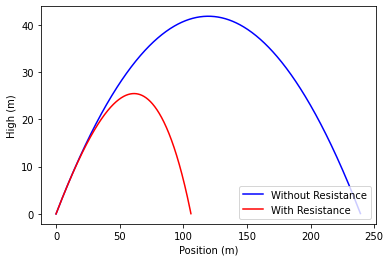

In [32]:
# DENGAN HAMBATAN

#inisiasi posisi sumbu x,y,waktu
x_dh = 0 #posisi sumbu x (jarak awal - akhir lemparan)
y_dh = 0 #posisi sumbu y (ketinggian)
t_dh = 0 #waktu 
position_dh = [x_dh] #array posisi
high_dh = [y_dh] #array ketinggian
time_dh = [t_dh] #array waktu

# inisiasi kecepatan awal pada sumbu x dan y
vx = kec_awal_vx(v0,s_tembak)
vy = kec_awal_vy(v0,s_tembak)

# inisiasi percepatan pada sumbu x,y (dengan hambatan)
v = np.sqrt(pow(vx,2)+pow(vy,2))
ax_dh = -((D/m)*v*vx)
ay_dh = -9.8 - ((D/m)*v*vy)

#inisiasi untuk menentukan titik tertinggi max 
y_max_dh = 0 

#perulangan untuk menentukan posisi sumbu x,y setiap waktu 
while y_dh >= 0:
    v = np.sqrt(pow(vx,2)+pow(vy,2))
    ax_dh = -((D/m)*v*vx)
    ay_dh = -9.8 - ((D/m)*v*vy)
    vx = position_numerical_vx(vx,ax_dh,dt)
    vy = position_numerical_vy(vy,ay_dh,dt)
    y_dh = position_numerical_y(y_dh,vy,dt)
    x_dh = position_numerical_x(x_dh,vx,dt)
    t_dh = t_dh + dt
    if  y_dh < 0:
        break
    if y_dh > y_max_dh:
        y_max_dh = y_dh
    position_dh.append(x_dh)
    high_dh.append(y_dh)
    time_dh.append(t_dh)

#Visualisasi Tanpa Hambatan
print ('====Tanpa Hambatan=====')
print ('High = ',y_th_max,'meter')
print ('Position = ',position_th[-1],'meter')
#print ('Time = ', time_th)
print("total time : ",time_th[-1],'second')
plt.plot(position_th,high_th,c='b', label ='Numerical without Air Resistance')
plt.xlabel('Position (m)')
plt.ylabel('High (m)')

#Visualisasi Dengan Hambatan
print('\n')
print ('====Dengan Hambatan=====')
print ('High = ',y_max_dh,'meter')
print ('Position = ',position_dh[-1],'meter')
#print ('Time = ', time_dh)
print("total time : ",time_dh[-1],'second')
plt.plot(position_dh,high_dh,c='r', label ='Numerical without Air Resistance')
plt.xlabel('Position (m)')
plt.ylabel('High (m)')
plt.legend(['Without Resistance','With Resistance'],loc='best') 
plt.show()